# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 646


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(query_url + city).json()
      
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | saint-pierre
Processing Record 5 of Set 1 | dunedin
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | port lavaca
Processing Record 8 of Set 1 | qingdao
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | lerwick
Processing Record 11 of Set 1 | bathsheba
Processing Record 12 of Set 1 | porto velho
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | maraba
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set 1 | dhidhdhoo
Processing Record 20 of Set 1 | cesenatico
Processing Record 21 of Set 1 | yanam
Processing Record 22 of Set 1 | tsihombe
City not found. S

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,78.96,94,75,5.75,TO,2023-02-08 05:25:04
1,ushuaia,-54.8000,-68.3000,56.86,58,40,11.50,AR,2023-02-08 05:24:08
2,hobart,-42.8794,147.3294,66.27,64,40,14.97,AU,2023-02-08 05:15:07
3,saint-pierre,-21.3393,55.4781,83.88,70,0,27.63,RE,2023-02-08 05:25:05
4,dunedin,-45.8742,170.5036,60.71,48,53,17.22,NZ,2023-02-08 05:21:33


In [40]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,78.96,94,75,5.75,TO,2023-02-08 05:25:04
1,ushuaia,-54.8000,-68.3000,56.86,58,40,11.50,AR,2023-02-08 05:24:08
2,hobart,-42.8794,147.3294,66.27,64,40,14.97,AU,2023-02-08 05:15:07
3,saint-pierre,-21.3393,55.4781,83.88,70,0,27.63,RE,2023-02-08 05:25:05
4,dunedin,-45.8742,170.5036,60.71,48,53,17.22,NZ,2023-02-08 05:21:33


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

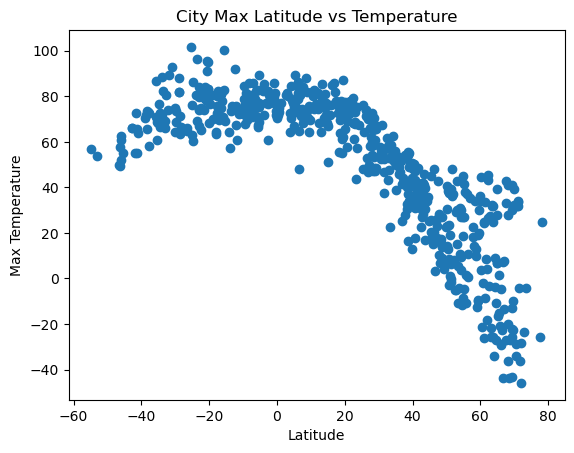

<Figure size 640x480 with 0 Axes>

In [42]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Max Latitude vs Temperature')
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

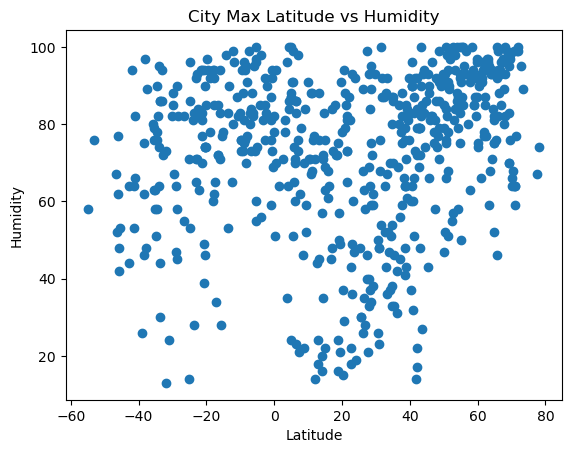

<Figure size 640x480 with 0 Axes>

In [43]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x_values2 = city_data_df['Lat']
y_values2 = city_data_df['Humidity']
plt.scatter(x_values2,y_values2)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Max Latitude vs Humidity')
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

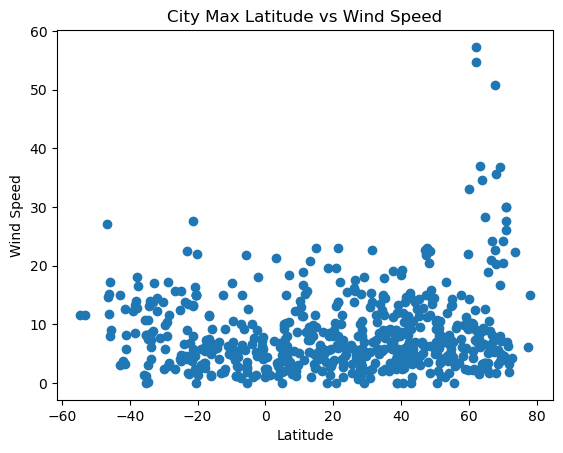

<Figure size 640x480 with 0 Axes>

In [44]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x_values3 = city_data_df['Lat']
y_values3 = city_data_df['Wind Speed']
plt.scatter(x_values3,y_values3)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Max Latitude vs Wind Speed')
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

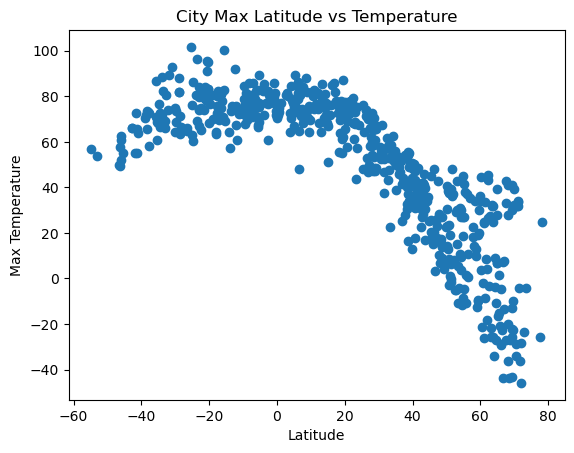

<Figure size 640x480 with 0 Axes>

In [45]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x_values4 = city_data_df['Lat']
y_values4 = city_data_df['Max Temp']
plt.scatter(x_values4,y_values4)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Max Latitude vs Temperature')
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def LinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,albany,42.6001,-73.9662,37.54,79,84,3.74,US,2023-02-08 05:22:21
6,port lavaca,28.6150,-96.6261,70.30,95,100,8.05,US,2023-02-08 05:25:07
7,qingdao,36.0986,120.3719,46.00,31,0,8.95,CN,2023-02-08 05:25:08
9,lerwick,60.1545,-1.1494,44.60,74,100,33.08,GB,2023-02-08 05:25:10
10,bathsheba,13.2167,-59.5167,75.81,88,75,20.71,BB,2023-02-08 05:25:11


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,78.96,94,75,5.75,TO,2023-02-08 05:25:04
1,ushuaia,-54.8000,-68.3000,56.86,58,40,11.50,AR,2023-02-08 05:24:08
2,hobart,-42.8794,147.3294,66.27,64,40,14.97,AU,2023-02-08 05:15:07
3,saint-pierre,-21.3393,55.4781,83.88,70,0,27.63,RE,2023-02-08 05:25:05
4,dunedin,-45.8742,170.5036,60.71,48,53,17.22,NZ,2023-02-08 05:21:33


###  Temperature vs. Latitude Linear Regression Plot

In [64]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values_nh = northern_hemi_df['Lat']
y_values_nh = northern_hemi_df['Max Temp']
(slope_nh, intercept_nh, rvalue_nh, pvalue_nh, stderr_nh) = linregress(x_values_nh, y_values_nh)
regress_values_nh = x_values_nh * slope_nh + intercept_nh
line_eq_nh = "y = " + str(round(slope_nh,2)) + "x + " + str(round(intercept_nh,2))
line_eq_nh

'y = -1.36x + 92.38'

In [65]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values_sh = southern_hemi_df['Lat']
y_values_sh = southern_hemi_df['Max Temp']
(slope_sh, intercept_sh, rvalue_sh, pvalue_sh, stderr_sh) = linregress(x_values_sh, y_values_sh)
regress_values_sh = x_values_sh * slope_sh + intercept_sh
line_eq_sh = "y = " + str(round(slope_sh,2)) + "x + " + str(round(intercept_sh,2))
line_eq_sh

'y = 0.3x + 80.49'

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.745526488678275


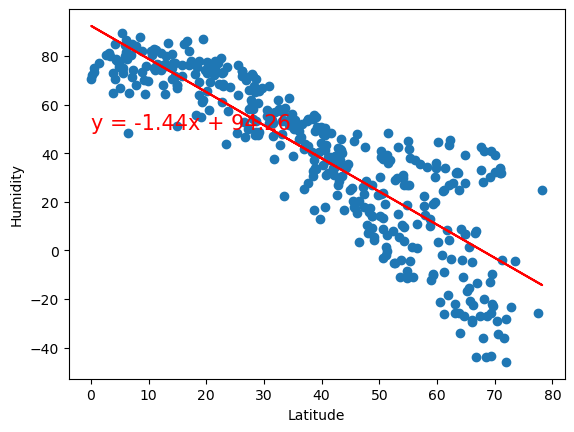

In [66]:
# Northern Hemisphere
# YOUR CODE HERE
plt.scatter(x_values_nh,y_values_nh)
plt.plot(x_values_nh,regress_values_nh,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue_nh**2}")
plt.show()

The r-squared is: 0.17414110935359478


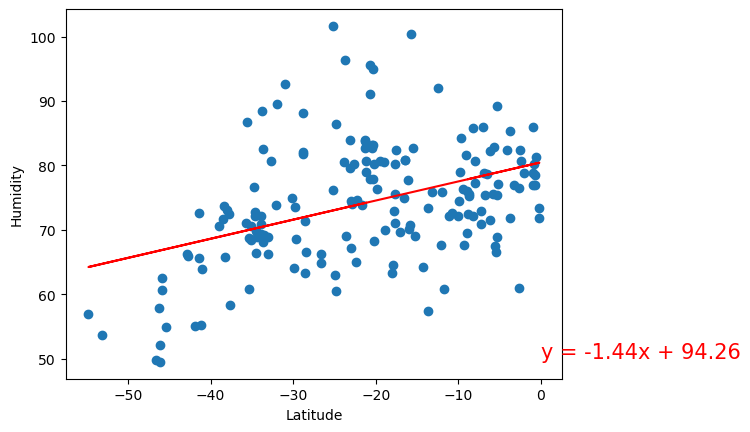

In [67]:
# Southern Hemisphere
# YOUR CODE HERE
plt.scatter(x_values_sh,y_values_sh)
plt.plot(x_values_sh,regress_values_sh,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue_sh**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02931784991571754


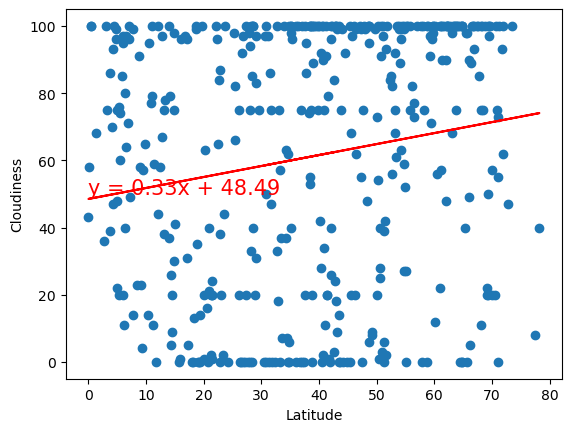

In [70]:
# Northern Hemisphere
# YOUR CODE HERE
y_values_c_nh = northern_hemi_df['Cloudiness']

(slope_c_nh, intercept_c_nh, rvalue_c_nh, pvalue_c_nh, stderr_c_nh) = linregress(x_values_nh, y_values_c_nh)
regress_values_c_nh = x_values_nh * slope_c_nh + intercept_c_nh
line_eq_c_nh = "y = " + str(round(slope_c_nh,2)) + "x + " + str(round(intercept_c_nh,2))
line_eq_c_nh
plt.scatter(x_values_nh,y_values_c_nh)
plt.plot(x_values_nh,regress_values_c_nh,"r-")
plt.annotate(line_eq_c_nh,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue_c_nh**2}")
plt.show()

The r-squared is: 0.13669312422979915


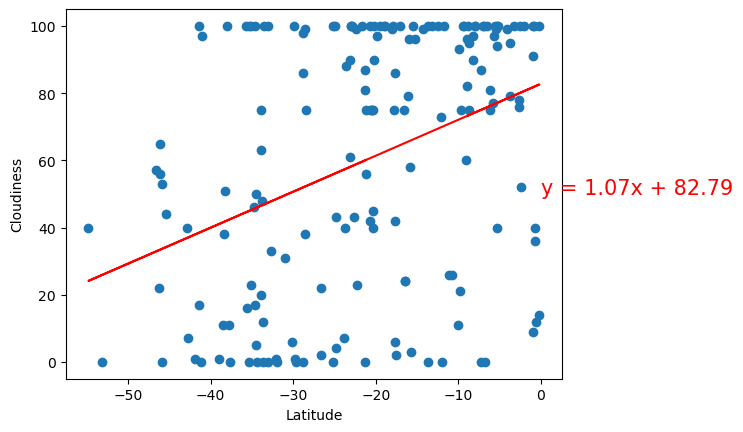

In [71]:
# Southern Hemisphere
# YOUR CODE HERE
y_values_c_sh = southern_hemi_df['Cloudiness']

(slope_c_sh, intercept_c_sh, rvalue_c_sh, pvalue_c_sh, stderr_c_sh) = linregress(x_values_sh, y_values_c_sh)
regress_values_c_sh = x_values_sh * slope_c_sh + intercept_c_sh
line_eq_c_sh = "y = " + str(round(slope_c_sh,2)) + "x + " + str(round(intercept_c_sh,2))
line_eq_c_sh
plt.scatter(x_values_sh,y_values_c_sh)
plt.plot(x_values_sh, regress_values_c_sh,"r-")
plt.annotate(line_eq_c_sh,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue_c_sh**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0486125425612562


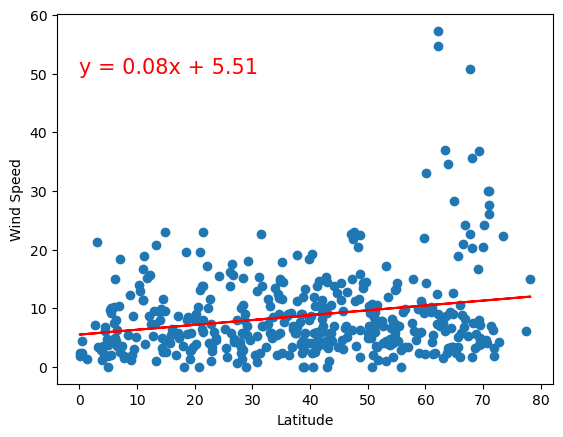

In [75]:
# Northern Hemisphere
# YOUR CODE HERE
y_values_w_nh = northern_hemi_df['Wind Speed']

(slope_w_nh, intercept_w_nh, rvalue_w_nh, pvalue_w_nh, stderr_w_nh) = linregress(x_values_nh, y_values_w_nh)
regress_values_w_nh = x_values_nh * slope_w_nh + intercept_w_nh
line_eq_w_nh = "y = " + str(round(slope_w_nh,2)) + "x + " + str(round(intercept_w_nh,2))
line_eq_w_nh
plt.scatter(x_values_nh,y_values_w_nh)
plt.plot(x_values_nh, regress_values_w_nh,"r-")
plt.annotate(line_eq_w_nh,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue_w_nh**2}")
plt.show()

The r-squared is: 0.10409559467517196


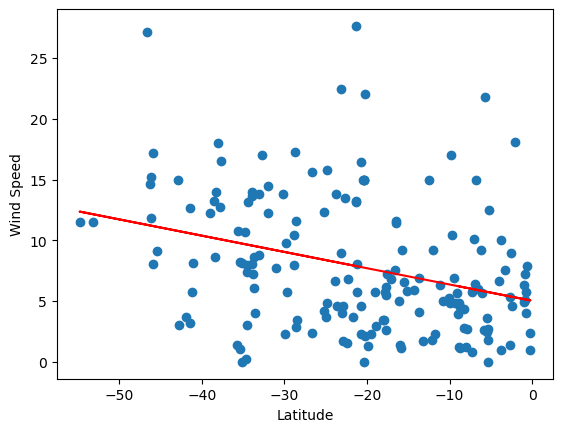

In [74]:
# Southern Hemisphere
# YOUR CODE HERE
y_values_w_sh = southern_hemi_df['Wind Speed']

(slope_w_sh, intercept_w_sh, rvalue_w_sh, pvalue_w_sh, stderr_w_sh) = linregress(x_values_sh, y_values_w_sh)
regress_values_w_sh = x_values_sh * slope_w_sh + intercept_w_sh
line_eq_w_sh = "y = " + str(round(slope_w_sh,2)) + "x + " + str(round(intercept_w_sh,2))
line_eq_w_sh
plt.scatter(x_values_sh,y_values_w_sh)
plt.plot(x_values_sh, regress_values_w_sh,"r-")
plt.annotate(line_eq_w_sh,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue_w_sh**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# in the northern hemisphere, Humidity decreases as Latitude increases.
# in the southern hemisphere, Humidity increases as Latitude increases.